In this notebook we calculate pseudotime on the replicate 1 snMultiome data. We use this pseudotime calculation to impute the pseudotime into the DC3000 snMultiome data. The DC3000 snMultiome data serves as an anchorpoint for us to finally transfer pseudotime labels to the DC3000 MERFISH data.

The reason that we are performing this work around is because we only have DC3000 data taken at the same time as the replicate 1 snMultiome data. We do not have DC3000 data taken at the same time as the replicate 2 snMultiome data. Therefore, to reduce batch effect, we do not use the pseudotime that was calculated across both replicates in a previous notebook.

I need to change this to just use the previous calculated pseudotime subset to only the rep1 cells

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import os, sys
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import diopy

In [6]:
scrna = r'/projects/Alex/Spatiotemporal_Atlas_Ecker/data/AvrRpt2_alone.h5'

In [38]:
adata = diopy.input.read_h5(file = scrna)

In [39]:
adata.obs = adata.obs[[i for i in adata.obs.columns if 'pANN' not in i]]
adata.obs = adata.obs[[i for i in adata.obs.columns if 'DF.classifications' not in i]]

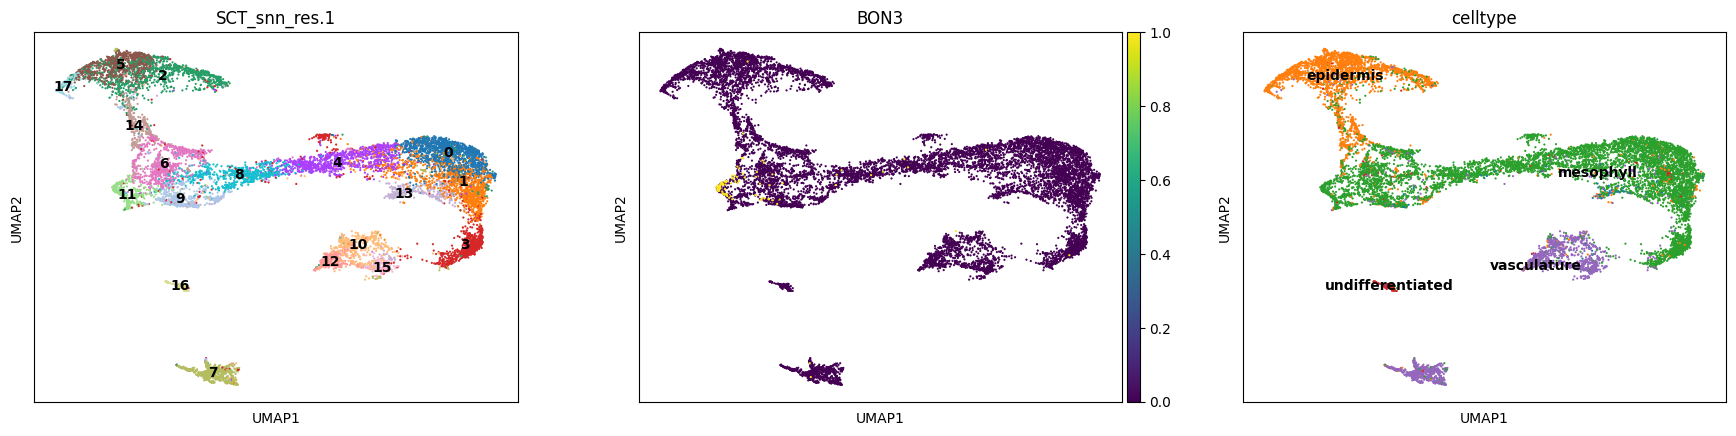

In [40]:
sc.pl.umap(adata, color=['SCT_snn_res.1', 'BON3', 'celltype'], vmax=1, legend_loc= 'on data')

In [41]:
adata = adata[adata.obs['celltype'].isin(['mesophyll'])]
adata.obs_names_make_unique()


In [42]:
adata.raw=adata

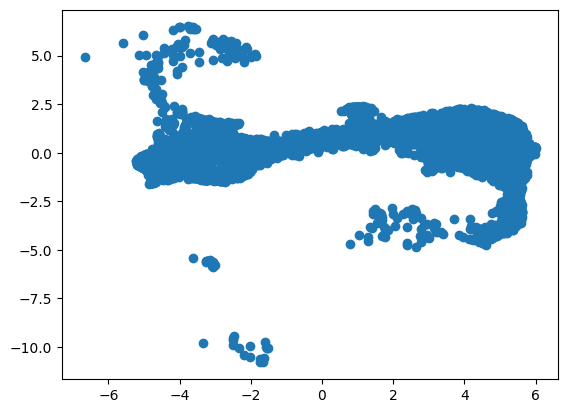

In [43]:
plt.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1])

In [44]:
adata = adata[adata.obsm['X_umap'][:, 1] > -5]

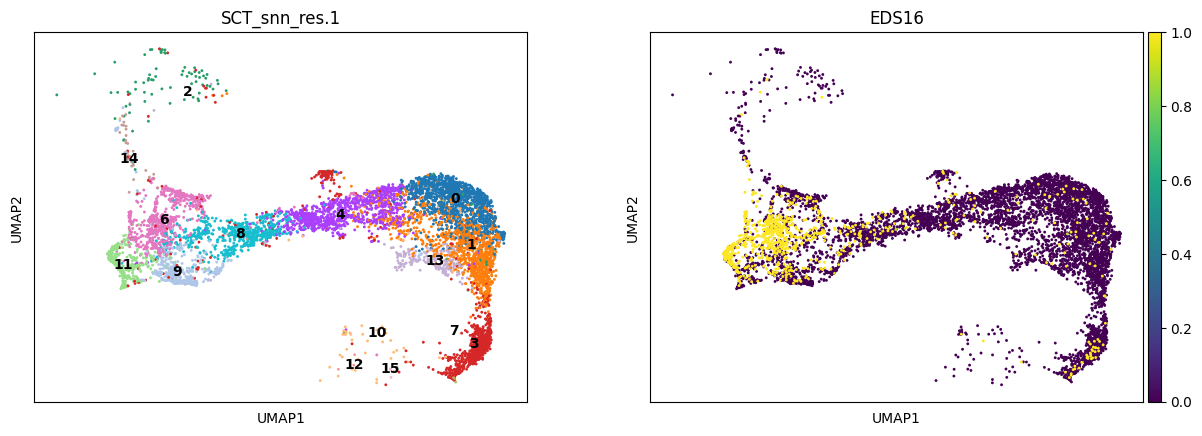

In [45]:
sc.pl.umap(adata, color=['SCT_snn_res.1', 'EDS16'], legend_loc='on data', vmax=1)

In [53]:
top_left = np.array([7, 1])

In [54]:

# Calculate the distance from the target point to each row
distances = np.linalg.norm(adata.obsm['X_umap'][:, :2] - top_left, axis=1)

# Find the row index with the minimum distance
min_distance_row_index = np.argmin(distances)

In [55]:
adata.uns['iroot'] = min_distance_row_index

In [56]:
sc.pp.neighbors(adata)

In [57]:
sc.tl.dpt(adata, n_dcs=2)

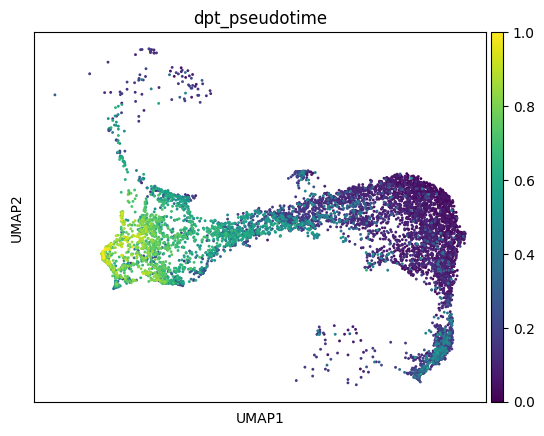

In [58]:
sc.pl.umap(adata, color='dpt_pseudotime')

In [64]:
import pandas as pd

In [65]:
pseudotime_csv = pd.DataFrame(adata.obs['dpt_pseudotime'])

In [68]:
pseudotime_csv.to_csv(r'/projects/Alex/Spatiotemporal_Atlas_Ecker/data/pseudotime_csv.csv')